In [1]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from pylab import imread
from skimage.color import rgb2gray
import pywt
import pywt.data
from pywt import dwt2, idwt2
import warnings
warnings.filterwarnings('ignore')

In [2]:
def ShowImage(ImageList, nRows = 1, nCols = 2, WidthSpace = 0.00, HeightSpace = 0.00, title = None):
    gs = gridspec.GridSpec(nRows, nCols)
    gs.update(wspace=WidthSpace, hspace=HeightSpace) # set the spacing between axes.
    plt.figure(figsize=(20,10))
    for i in range(len(ImageList)):
        ax1 = plt.subplot(gs[i])
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        
        plt.subplot(nRows, nCols, i+1)
        
        image = ImageList[i].copy()
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
        else:
            plt.imshow(image)
        if title:
            plt.title(title[i])
        else:
            plt.title("Image " + str(i+1))
        plt.axis('off')
    plt.show()

In [3]:
def read_image(img_name):
    img_color = imread(img_name)
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)
    img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)
    return (img_color, img_gray, img_hsv)

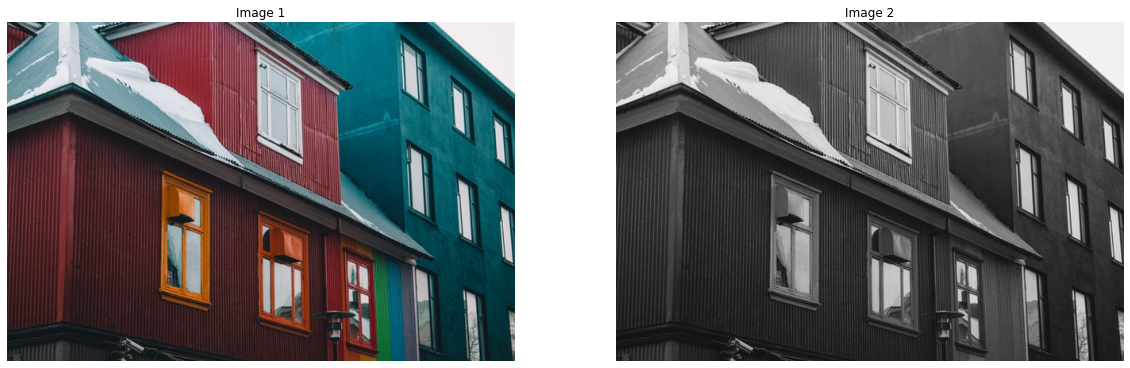

In [4]:
# Read Image
img_color, img_gray = read_image("house1.jpg")[:2]
# Display Image
ShowImage([img_color, img_gray], 1, 2)

In [6]:
def wavelet_transform(image, func_wavelet, level=None):
    x = image.astype(np.float32)
    coeffs2 = pywt.wavedec2(x, func_wavelet, mode='periodization', level=level)
    LL, (LH, HL, HH) = coeffs2[:2]
    return LL, (LH, HL, HH)

# LL, (LH, HL, HH) = wavelet_transform(img_gray, discrete_wavelets[3], level=0)
# ShowImage([LL, LH, HL, HH], 1, 4)

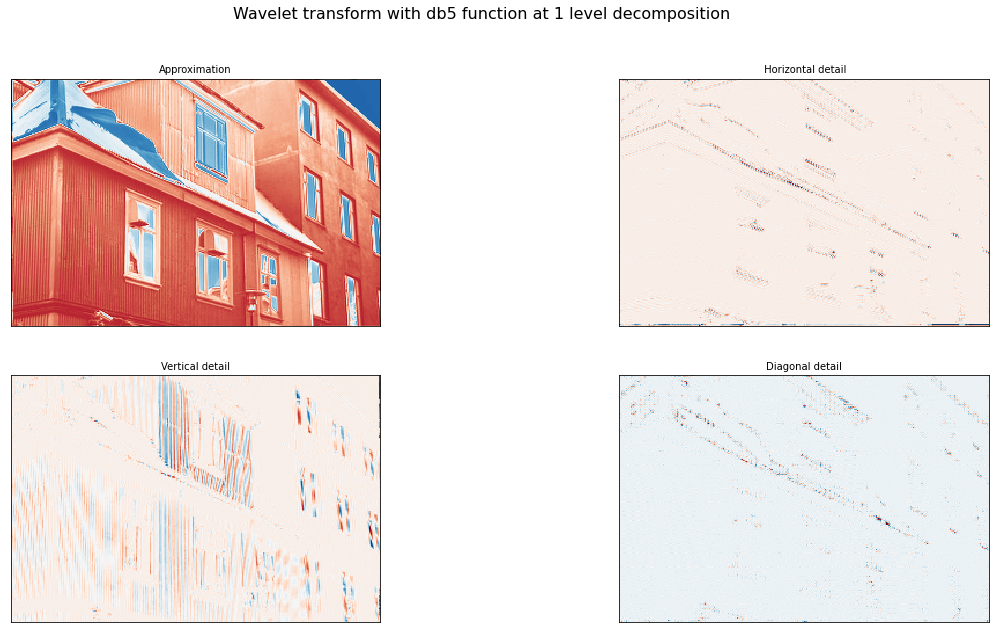

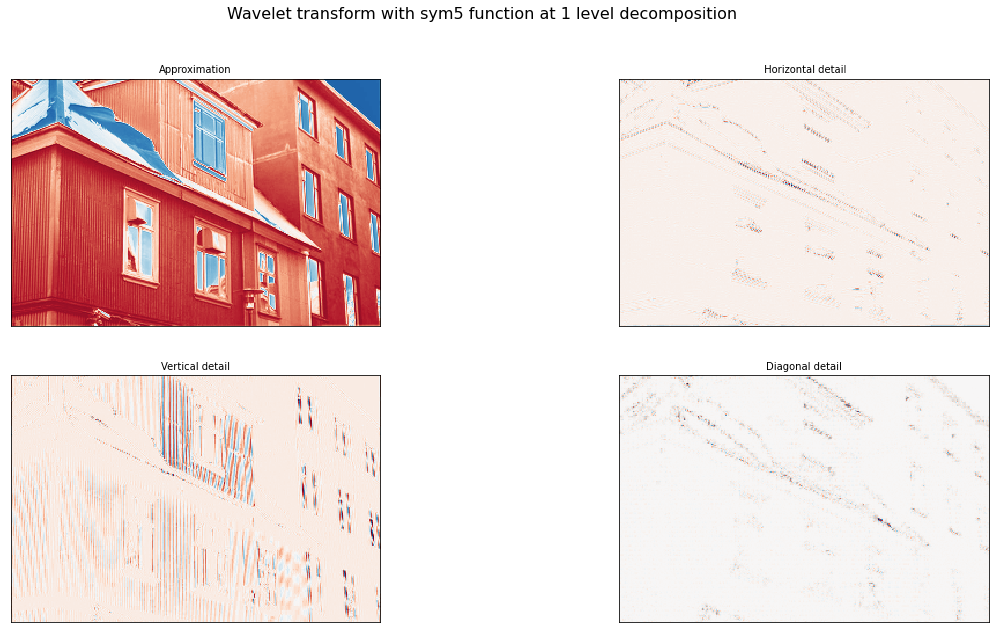

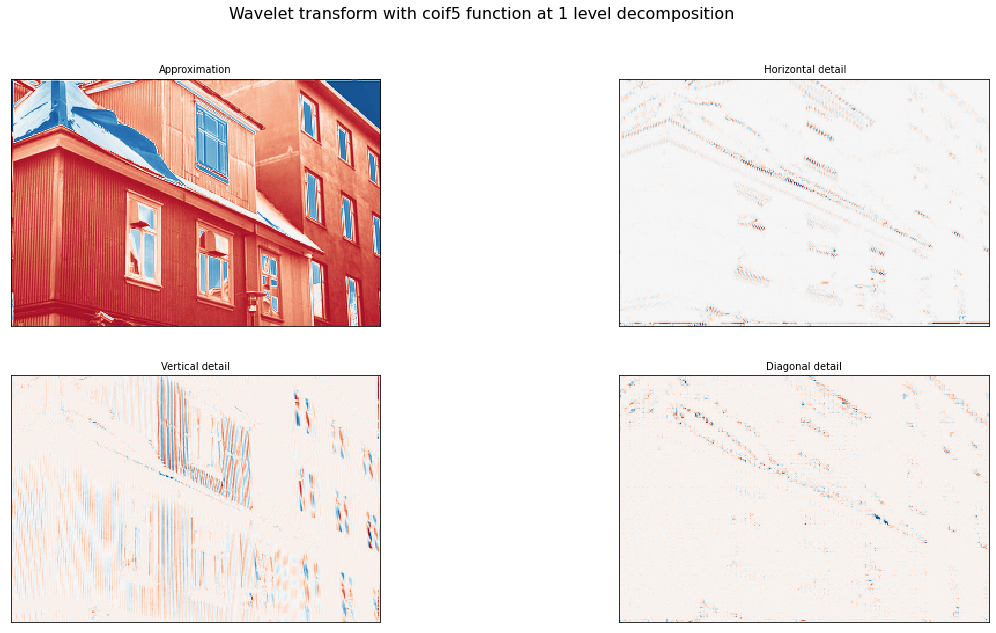

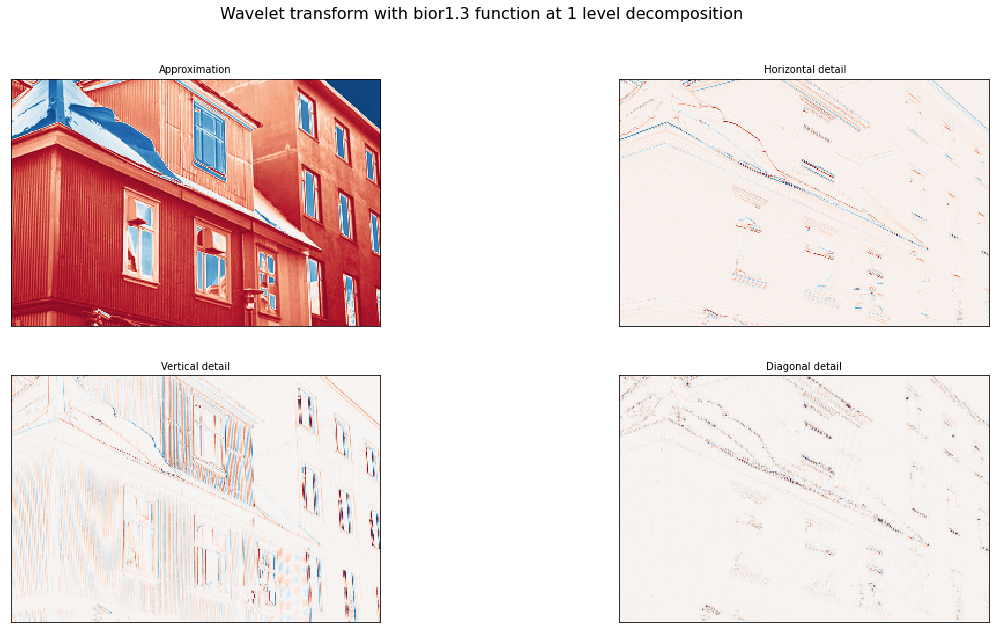

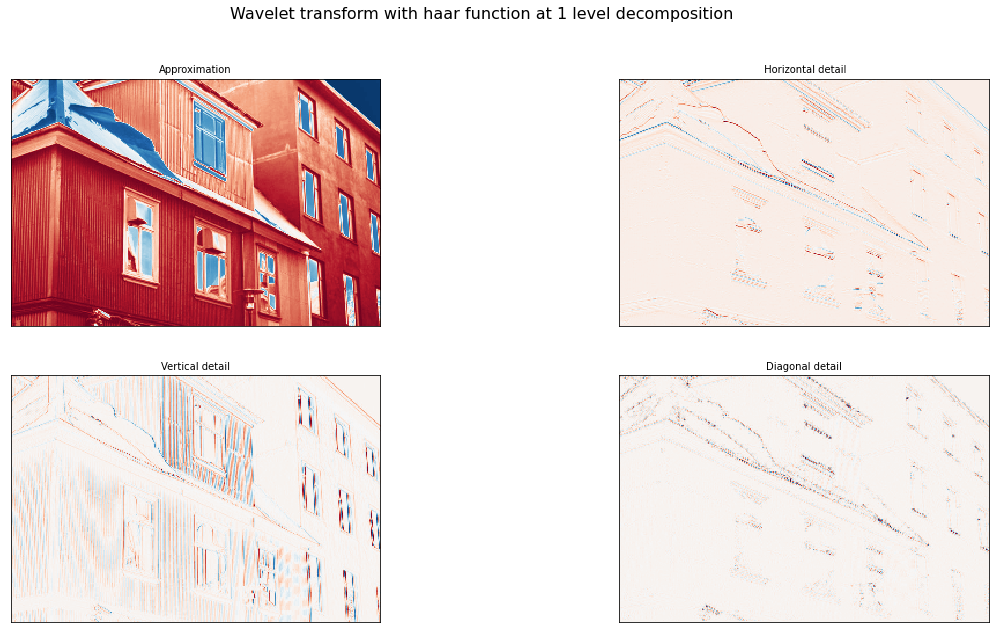

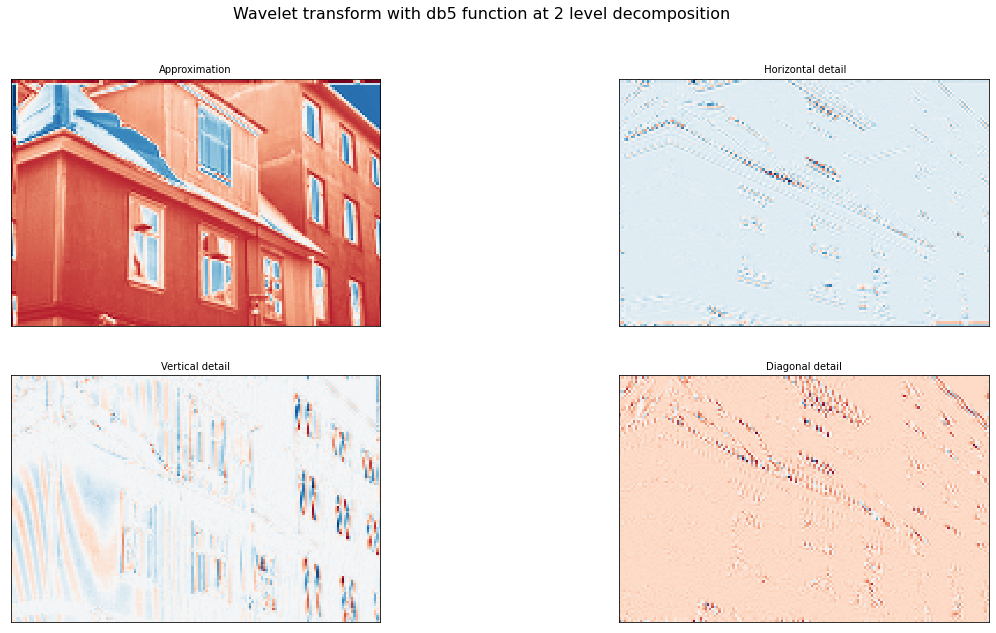

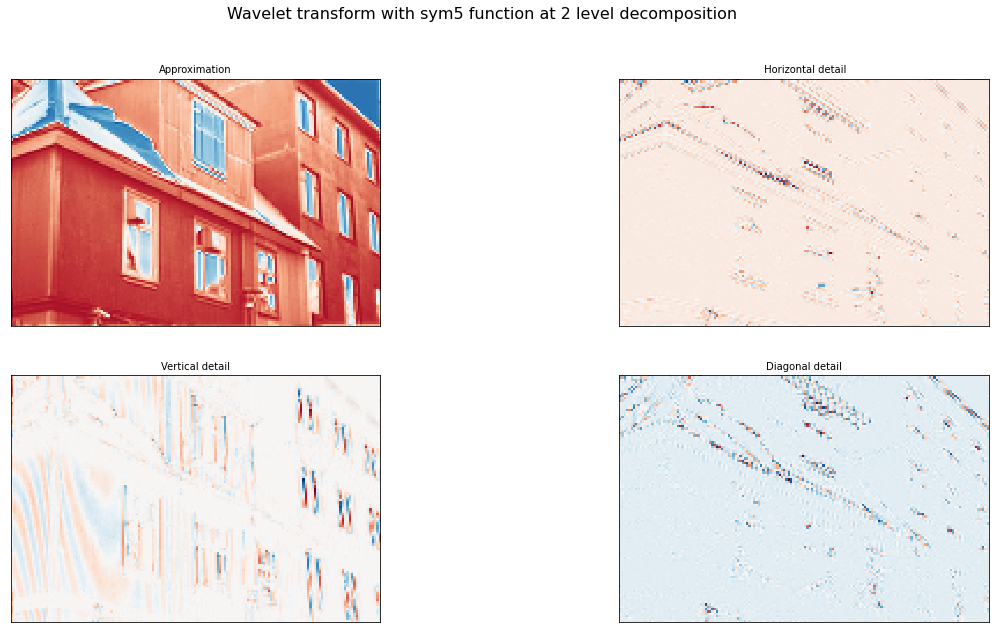

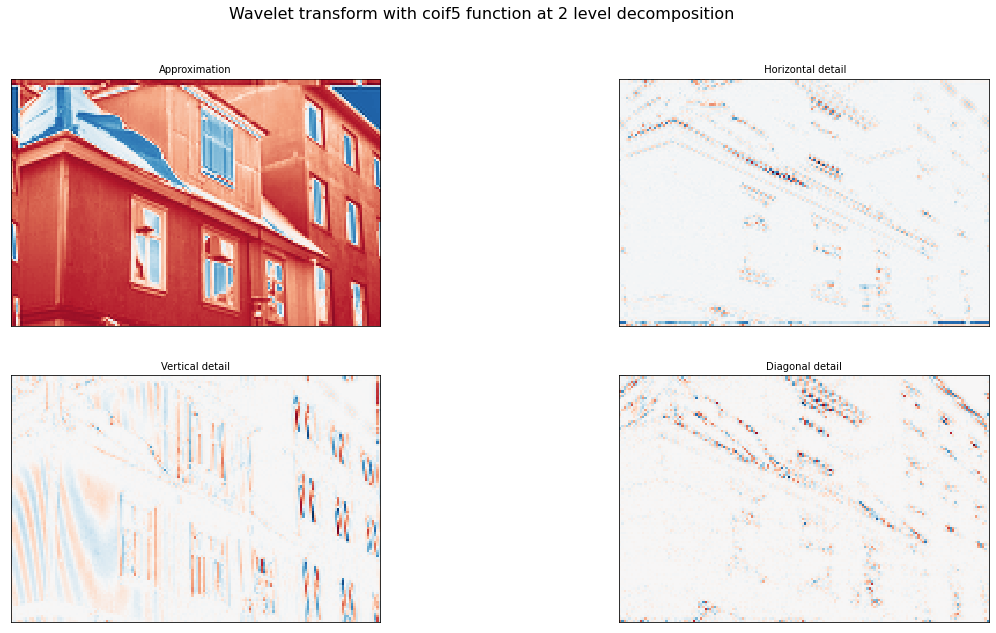

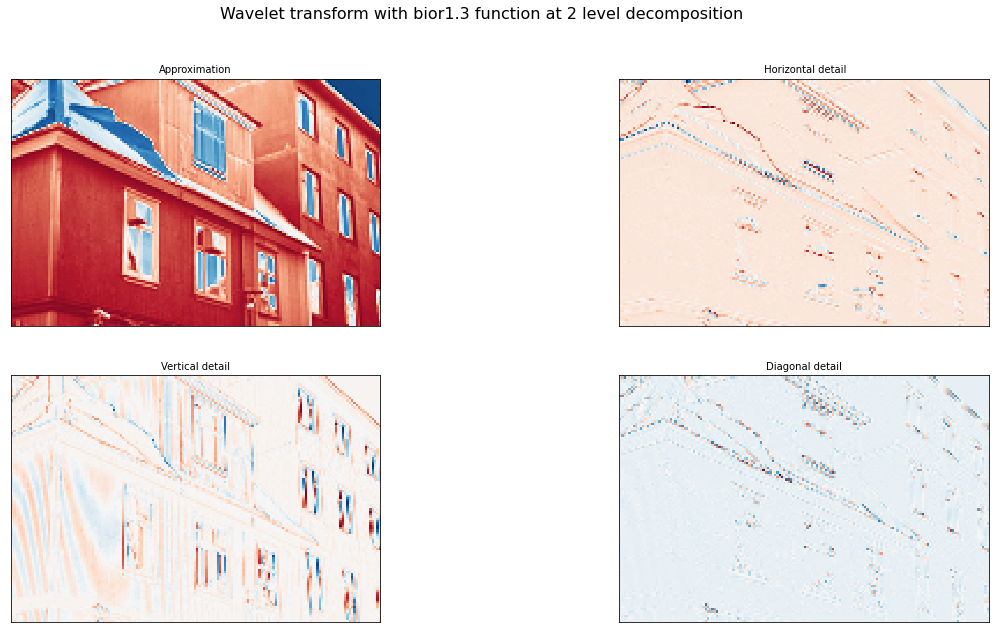

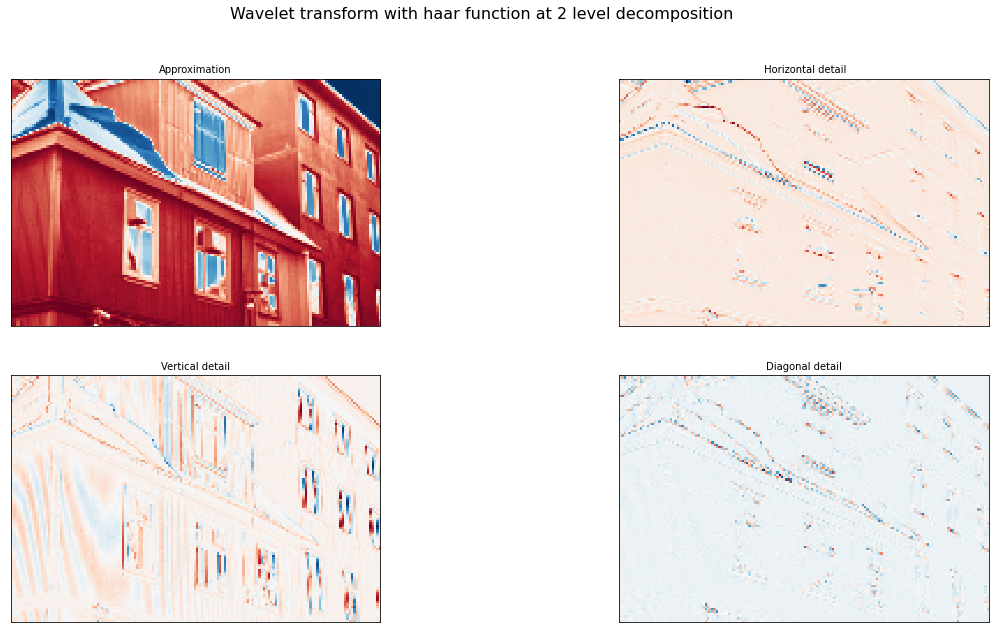

In [12]:
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior1.3', 'haar']
cmapList = [cm.gray, cm.jet, cm.rainbow, cm.viridis, cm.cubehelix, cm.RdBu]
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
for level in range(1,3):
    for function in discrete_wavelets:
        print()
        LL, (LH, HL, HH) = wavelet_transform(img_gray, function, level)[:4]
        
        fig = plt.figure(figsize=(20,10))
        fig.suptitle("Wavelet transform with " + function + " function at "\
                     + str(level) + " level decomposition", fontsize = 16)
        for i, a in enumerate([LL, LH, HL, HH]):
            ax = fig.add_subplot(2, 2, i + 1)
            ax.imshow(a, interpolation="nearest", cmap=cmapList[5])
            ax.set_title(titles[i], fontsize=10)
            ax.set_xticks([])
            ax.set_yticks([])
plt.show()

In [ ]:
# discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior1.3', 'haar']
# continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']
# list_list_wavelets = [discrete_wavelets, continuous_wavelets]
# list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]
# fig, axarr = plt.subplots(nrows=2, ncols=5, figsize=(16,8))
# for ii, list_wavelets in enumerate(list_list_wavelets):
#     func = list_funcs[ii]
#     row_no = ii
#     for col_no, waveletname in enumerate(list_wavelets):
#         wavelet = func(waveletname)
#         family_name = wavelet.family_name
#         biorthogonal = wavelet.biorthogonal
#         orthogonal = wavelet.orthogonal
#         symmetry = wavelet.symmetry
#         if ii == 0:
#             _ = wavelet.wavefun()
#             wavelet_function = _[0]
#             x_values = _[-1]
#         else:
#             wavelet_function, x_values = wavelet.wavefun()
#         if col_no == 0 and ii == 0:
#             axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
#         if col_no == 0 and ii == 1:
#             axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
#         axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
#         axarr[row_no, col_no].plot(x_values, wavelet_function)
#         axarr[row_no, col_no].set_yticks([])
#         axarr[row_no, col_no].set_yticklabels([])
# plt.tight_layout()
# plt.show()

In [ ]:
# # Wavelet transform of image, and plot approximation and details
# titles = ['Approximation', ' Horizontal detail',
#           'Vertical detail', 'Diagonal detail']
# x = img_gray.astype(np.float32)
# coeffs2 = pywt.wavedec2(x, discrete_wavelets[0], mode='periodization', level=2)
# # print(coeffs2)
# # print(coeffs2[1])
# LL, (LH, HL, HH) = coeffs2[:2]
# # # Display Image
# ShowImage([LL, LH, HL, HH], 2, 2)

In [ ]:
# from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

# x = img_gray.astype(np.float32)
# shape = x.shape

# max_lev = 3 # how many levels of decomposition to draw
# label_levels = 3 # how many levels to explicitly label on the plots


# fig, axes = plt.subplots(2, 4, figsize=[14, 8])
# for level in range(0, max_lev + 1):
#     if level == 0:
#         # show the original image before decomposition
#         axes[0, 0].set_axis_off()
#         axes[1, 0].imshow(x, cmap=plt.cm.gray)
#         axes[1, 0].set_title('Image')
#         axes[1, 0].set_axis_off()
#         continue
        
#     # plot subband boundaries of a standard DWT basis
#     draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
#                      label_levels=label_levels)
#     axes[0, level].set_title('{} level\ndecomposition'.format(level))
    
#     # compute the 2D DWT
#     c = pywt.wavedec2(x, 'db2', mode='periodization', level=level)
#     # normalize each coefficient array independently for better visibility
#     c[0] /= np.abs(c[0]).max()
#     for detail_level in range(level):
#         c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
#     # show the normalized coefficients
#     arr, slices = pywt.coeffs_to_array(c)
#     axes[1, level].imshow(arr, cmap=plt.cm.gray)
#     axes[1, level].set_title('Coefficients\n({} level)'.format(level))
#     axes[1, level].set_axis_off()
    
# plt.tight_layout()
# plt.show()